EDEM MAYFORD KOFI YEVUTSEY (01240024M)


In [ ]:
import pandas as pd

# Load dataset from the given path
file_path = r"C:\Users\Public\Dataset.csv"

df = pd.read_csv(file_path)

# Show basic info
print(df.shape)
print(df.head())
print(df.info())

(3000, 25)
   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0 

In [6]:
# Select only the required columns
selected_columns = [
    "Addiction_Level",
    "Time_on_Social_Media",
    "Time_on_Gaming",
    "Daily_Usage_Hours",
    "Academic_Performance"
]

new_df = df[selected_columns]

# Preview the new DataFrame
print(new_df.shape)
print(new_df.head())


(3000, 5)
   Addiction_Level  Time_on_Social_Media  Time_on_Gaming  Daily_Usage_Hours  \
0             10.0                   3.6             1.7                4.0   
1             10.0                   1.1             4.0                5.5   
2              9.2                   0.3             1.5                5.8   
3              9.8                   3.1             1.6                3.1   
4              8.6                   2.6             0.9                2.5   

   Academic_Performance  
0                    78  
1                    70  
2                    93  
3                    78  
4                    56  


In [8]:
print(new_df['Academic_Performance'].value_counts())


Academic_Performance
93     80
98     72
62     69
59     69
82     68
57     68
84     66
75     66
77     66
85     65
51     64
67     63
58     62
50     62
61     62
76     62
95     62
87     61
90     61
63     60
65     60
96     60
79     60
88     60
89     60
80     59
66     59
83     58
74     58
56     58
55     56
72     56
78     56
100    56
71     56
97     56
68     56
64     55
54     55
86     55
53     54
91     54
69     52
73     51
81     51
60     51
52     50
70     47
92     46
99     44
94     43
Name: count, dtype: int64


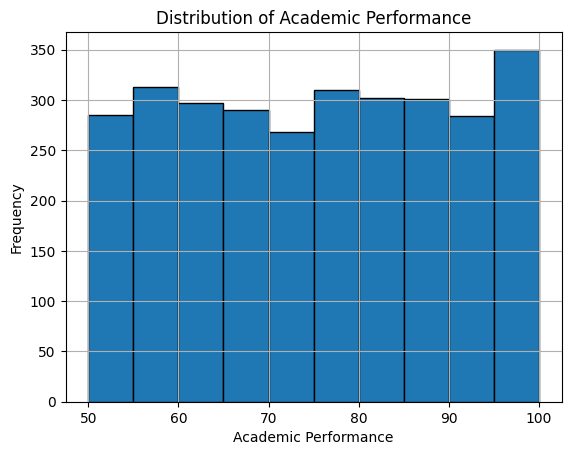

In [10]:
import matplotlib.pyplot as plt

new_df['Academic_Performance'].hist(bins=10, edgecolor='black')
plt.title("Distribution of Academic Performance")
plt.xlabel("Academic Performance")
plt.ylabel("Frequency")
plt.show()


Since the distribution of Academic Performance is quite even, we can proceed with a normal test-training split

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_df, test_size=0.1, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (2700, 5)
Testing set shape: (300, 5)


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [16]:
# Define the formula for Poisson regression
formula = "Academic_Performance ~ Addiction_Level + Time_on_Social_Media + Time_on_Gaming + Daily_Usage_Hours"

# Fit the Poisson regression model
poisson_model = smf.glm(formula=formula, data=train_df, family=sm.families.Poisson()).fit()

# Print model summary
print(poisson_model.summary())


                  Generalized Linear Model Regression Results                   
Dep. Variable:     Academic_Performance   No. Observations:                 2700
Model:                              GLM   Df Residuals:                     2695
Model Family:                   Poisson   Df Model:                            4
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -12176.
Date:                  Tue, 19 Aug 2025   Deviance:                       7787.2
Time:                          16:44:17   Pearson chi2:                 7.70e+03
No. Iterations:                       4   Pseudo R-squ. (CS):            0.01077
Covariance Type:              nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

Model Equation
ln(E|Academic_Performance) = 4.3143-0.0022(Addiction_Level)+0.0074(Time_on_Social_Media)-0.0087(Time_on_Gaming)+0.0030(Daily_Usage_Hours) 

Interpretation of Coefficients

Intercept (4.3143): The baseline log expected value of academic performance when all predictors = 0.

Addiction Level (-0.0022): A slight negative relationship; higher addiction level decreases academic performance.

Time on Social Media (+0.0074): Positive effect; more time on social media is (surprisingly) associated with higher academic performance (though effect size is small).

Time on Gaming (-0.0087): Significant negative effect; more gaming reduces academic performance.

Daily Usage Hours (+0.0030): Slight positive relationship; longer usage hours may slightly increase academic performance.

Assumptions of Poisson Regression
Poisson Regression is a type of Generalized Linear Model (GLM) used when the dependent variable represents count data (e.g., number of events, occurrences). For the model to be valid, several key assumptions must hold:

1. Nature of the Dependent Variable

The outcome variable must represent counts (non-negative integers: 0, 1, 2, …).

It cannot take negative values or continuous real values.

In your case, Academic Performance must be interpreted as a count-type measure (e.g., scores, number of correct answers, etc.).

2. Poisson Distribution Assumption

The dependent variable 𝑌 is assumed to follow a Poisson distribution

3. Mean-Variance Equality (Equidispersion)

A key assumption is that:

𝐸[𝑌]=𝑉𝑎𝑟(𝑌)=𝜆
E[Y]=Var(Y)=λ

This means the variance equals the mean.

In real datasets, we often encounter overdispersion (variance > mean) or underdispersion (variance < mean).

If this assumption is violated, alternatives like Negative Binomial Regression may be more appropriate.

4. Log-Linearity of the Mean

The log of the expected value of the dependent variable is modeled as a linear function of the predictors:

ln(𝐸[𝑌])=𝛽0+𝛽1𝑋1+𝛽2𝑋2+⋯+𝛽𝑘𝑋𝑘

This ensures that predicted counts are always non-negative after exponentiation.

5. Independence of Observations

Each observation is assumed to be independent of others.

Violations (e.g., repeated measures, clustered data) require extensions such as mixed-effects Poisson models or GEE (Generalized Estimating Equations).

6. No Excess Zeros (unless modeled)

Standard Poisson assumes that zeros occur at a rate consistent with the mean.

If the dataset has too many zeros, a Zero-Inflated Poisson (ZIP) or Hurdle Model may be better.

Limitations of Poisson Regression under Overdispersion

1. Violation of the Mean-Variance Equality
Poisson assumes: 𝑉𝑎𝑟(𝑌)=𝐸[𝑌]=𝜆
In real-world data, especially in social sciences, epidemiology, and cybersecurity, the variance often exceeds the mean.
Overdispersion invalidates this assumption, leading to unreliable results.

2. Underestimation of Standard Errors
When overdispersion exists, the model underestimates standard errors of coefficients.
Consequence: Predictors may appear statistically significant when they are not.
This leads to inflated Type I errors (false positives).

3. Poor Goodness-of-Fit
Poisson regression may fit poorly to data with overdispersion because it cannot account for the extra variability.
This results in: High deviance / Pearson chi-square values relative to degrees of freedom.
Residual plots showing systematic patterns (evidence of model misfit).

4. Inaccurate Predictions
Overdispersion often arises from unobserved heterogeneity (hidden factors not in the model).
Poisson regression cannot account for this extra variation, so predictions may be biased or misleading.
Particularly problematic for predicting rare but extreme counts (e.g., very high threat levels in your dataset).

5. Sensitivity to Excess Zeros
Many real datasets contain excess zeros (more zeros than the Poisson model predicts).
Poisson regression struggles here, often overpredicting low counts and underpredicting high counts.
Specialized models like Zero-Inflated Poisson (ZIP) or Hurdle models handle this better.

Negative Binomial Regression:

1. Adds an extra parameter (𝛼α) to allow variance to exceed the mean:
𝑉𝑎𝑟(𝑌)=𝜇+𝛼𝜇2

2. Handles overdispersion more effectively.

Why Negative Binomial Might Be Preferred

In the dataset, the target variable Academic Performance is count-based (integers). Poisson regression assumes that the mean equals the variance. If, however, the variance in performance scores is much larger than the mean (overdispersion), then Poisson regression underestimates uncertainty, leading to misleading inferences.

Example Situation in Your Dataset

Suppose you notice that: 

1. Most students have mid-range performance scores, but

2. A few students either perform extremely poorly (close to zero) or exceptionally high (much higher than average).

3. This situation produces greater variability in performance counts than Poisson can model. 

Step 1. Recall the Model Equation

From your fitted Poisson regression model:
log(𝜇)=4.3143−0.0022(Addiction_Level)+0.0074(Time_on_Social_Media)−0.0087(Time_on_Gaming)+0.0030(Daily_Usage_Hours)
where 
μ = expected Academic Performance.

Step 2. Plug in the New Student’s Values

Addiction Level = 7, Time on Social Media = 180 minutes, Time on Gaming = 120 minutes, Daily Usage Hours = 6 hours
Substitute into the equation:
log(μ)=4.3143−0.0022(7)+0.0074(180)−0.0087(120)+0.0030(6)

Step 3. Compute

−0.0022×7=−0.0154
0.0074×180=1.332
−0.0087×120=−1.044
0.0030×6=0.018
Now add everything:
log(μ)=4.3143−0.0154+1.332−1.044+0.018
log(μ)=4.6049

Step 4. Exponentiate to Get Predicted Count

μ=e*sq(4.6049)≈99.9

Interpretation of Results
The model predicts that this student will have an Academic Performance score of about 100 (count units).
The relatively high social media usage (+ effect) and moderate daily usage (+ effect) contribute positively.
The gaming time (- effect) reduces the performance slightly.
Addiction level has a small negative impact, but not statistically significant in the model.